In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("C:/Users/justi/Downloads/train.csv")
data.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

## 데이터 종류  
**Date**: 날짜  
**Rented Bike Count**: 해당 시간에 대여된 자전거 수  
**Hour**: 해당 날짜의 시간 (0~23시)  
**Temperature(째C)**: 기온 (섭씨, °C)  
**Humidity(%)**: 습도 (%)  
**Wind speed (m/s)**: 풍속 (초당 미터)  
**Visibility (10m)**: 가시거리, 단위는 10미터 (예: 2000 → 20,000m)  
**Dew point temperature(째C)**: 이슬점 온도 (°C, 수분이 응결되는 온도)  
**Solar Radiation (MJ/m2)**: 태양 복사량 (평방미터당 메가줄)  
**Rainfall(mm)**: 강수량  
**Snowfall (cm)**: 적설량  
**Seasons**: 계절 (Winter, Spring, Summer, Autumn)  
**Holiday**: 공휴일 여부 (Holiday, No Holiday)  
**Functioning Day**: 따릉이 서비스 운영일 여부 (Yes, No)

In [13]:
data.isna().sum().sort_values()

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Temperature(째C)              800
Wind speed (m/s)             802
Seasons                      802
dtype: int64

## 유의미한 상관계수 찾기  
Temperature, Dew point temperature     0.917007   
Rented Bike Count    ,        Temperature     0.549391   
Humidity      ,     Visibility    -0.537763   
Humidity , Dew point temperature    0.535527   
Humidity  ,  Solar Radiation     -0.465179   
Rented Bike Count , Dew point temperature    0.398034

c:\Users\justi\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.



Text(0.5, 1.0, 'correlation heatmap')

c:\Users\justi\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.

c:\Users\justi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.



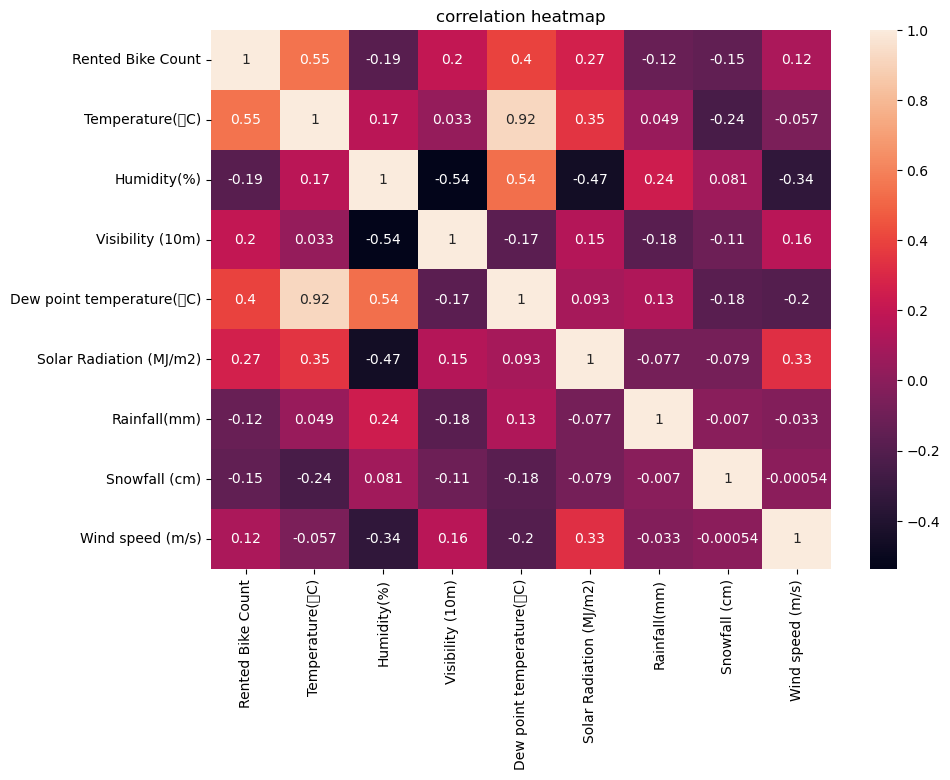

In [14]:
plt.figure(figsize=(10,7)) 
sns.heatmap(data[['Rented Bike Count', 'Temperature(째C)', 'Humidity(%)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Wind speed (m/s)']].corr(),annot=True)
plt.title('correlation heatmap')

In [15]:
corr_matrix = data[['Rented Bike Count', 'Temperature(째C)', 'Humidity(%)', 'Visibility (10m)', 
                  'Dew point temperature(째C)', 'Solar Radiation (MJ/m2)', 
                  'Rainfall(mm)', 'Snowfall (cm)', 'Wind speed (m/s)']].corr()

# np.ones 1로 채워진 행렬, ~np.trill 상삼각만 남기기, astype(bool) 1 = true 0 = false
corr_pairs = (
  corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))  
  .stack()
  .reset_index()
)
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 절댓값 기준 정렬
corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
sorted_corr_pairs = corr_pairs.sort_values(by='Abs Correlation', ascending=False)

# 상위 20개 출력
print(len(sorted_corr_pairs))
print(sorted_corr_pairs.head(20))

36
                   Variable 1                 Variable 2  Correlation  \
10            Temperature(째C)  Dew point temperature(째C)     0.917007   
0           Rented Bike Count            Temperature(째C)     0.549391   
15                Humidity(%)           Visibility (10m)    -0.537763   
16                Humidity(%)  Dew point temperature(째C)     0.535527   
17                Humidity(%)    Solar Radiation (MJ/m2)    -0.465179   
3           Rented Bike Count  Dew point temperature(째C)     0.398034   
11            Temperature(째C)    Solar Radiation (MJ/m2)     0.349506   
20                Humidity(%)           Wind speed (m/s)    -0.344381   
32    Solar Radiation (MJ/m2)           Wind speed (m/s)     0.330732   
4           Rented Bike Count    Solar Radiation (MJ/m2)     0.265525   
13            Temperature(째C)              Snowfall (cm)    -0.243888   
18                Humidity(%)               Rainfall(mm)     0.241985   
2           Rented Bike Count           Visibili

## 보간법 적용 전 이상치 탐색
시계열 데이터에서 풍속과 온도는 연속성이 강함  
따라서 결측치를 처리하기 위해 보간법 사용  

In [ ]:
fig = px.box(
  data,
  y='Temperature(째C)',
  points='outliers',
  title='온도 이상치 확인',
  width=600,     # 너비 
  height=400     # 높이 
)
fig.show()

In [30]:
fig = px.box(
  data,
  y='Wind speed (m/s)',
  points='outliers',
  title='풍속 이상치 확인',
  width=600,     # 너비 
  height=400     # 높이 
)
fig.show()

In [179]:
# 원본 데이터 보존
df = data.copy()

In [180]:
# season 결측치 date 변수를 이용해 채우기
def get_season(month):
  if month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  elif month in [9, 10, 11]:
    return 'Autumn'
  else:
    return 'Winter'

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 월(month) 추출
df['Month'] = df['Date'].dt.month

# 결측치만 get_season으로 채우기
df['Seasons'] = df['Seasons'].fillna(df['Month'].apply(get_season))

df.drop(columns='Month', inplace=True)
print(df['Seasons'].isna().sum()) 
print(df['Seasons'].unique()) 

0
['Winter' 'Spring' 'Summer' 'Autumn']


In [181]:
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='h')
# 시간순 정렬 및 인덱스 설정
df = df.set_index('Datetime')
df = df.sort_index()

df['Temperature(째C)'] = df['Temperature(째C)'].interpolate(method='time')
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].interpolate(method='time')
df.isna().sum().sort_values()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
fig = px.box(
  df,
  x='Seasons',  
  y='Rented Bike Count',
  points='outliers',  
  title='계절별 따릉이 대여량 분포'
)
fig.show()
# 겨울에는 대여량이 낮은 것으로 확인, 여름에 가장 대여량이 많음

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 계절 목록
seasons = ['Spring', 'Summer', 'Autumn', 'Winter'] 

# 2행 2열 subplot 생성
fig = make_subplots(
  rows=2, cols=2,
  subplot_titles=[f'{s} 대여량' for s in seasons],
  shared_yaxes=True,
  horizontal_spacing=0.1,
  vertical_spacing=0.15
)

# subplot 위치 설정용
positions = [(1,1), (1,2), (2,1), (2,2)]

for season, (row, col) in zip(seasons, positions):
  # 계절별 + 시간대별 평균 대여량 계산
  df_season = df[df['Seasons'] == season]
  grouped = df_season.groupby('Hour')['Rented Bike Count'].mean()

  fig.add_trace(
    go.Bar(
      x=grouped.index,
      y=grouped.values,
      name=season
    ),
    row=row,
    col=col
  )

fig.update_layout(
  height=800,
  width=1000,
  title_text="계절별 시간대별 따릉이 평균 대여량 ",
  showlegend=False,
  xaxis_title="시간대",
  yaxis_title="대여량"
)

fig.show()
# 출퇴근 시간에 대여량이 많아지는 것으로 보임. 특히 퇴근시간


In [52]:
fig = px.box(
  df,
  x='Holiday', 
  y='Rented Bike Count',
  points='outliers',
  title='휴일 여부에 따른 대여량 분포',
  width=1000
)
fig.show()

In [ ]:
fig = px.box(
  df,
  x='Functioning Day', 
  y='Rented Bike Count',
  points='outliers',
  title='서비스 유무에 따른 분포',
  width=1000
)
fig.show()
# 서비스를 하지 않은 날은 대여량 0

In [54]:
fig = px.scatter(
  df,
  x='Temperature(째C)',
  y='Rented Bike Count',
  title='기온 vs 따릉이 대여량',
  opacity=0.4
)
fig.show()

In [63]:
fig = px.scatter(
  df,
  x='Visibility (10m)',
  y='Rented Bike Count',
  title='가시거리 vs 따릉이 대여량',
  opacity=0.4
)
fig.show()

In [182]:
test = pd.read_csv("C:/Users/justi/Downloads/test.csv")
test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [183]:
test.isna().sum()

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

In [184]:
def get_season(month):
  if month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  elif month in [9, 10, 11]:
    return 'Autumn'
  else:
    return 'Winter'

# Date 열을 datetime 형식으로 변환
test['Date'] = pd.to_datetime(test['Date'], dayfirst=True)

# 월(month) 추출
test['Month'] = test['Date'].dt.month

# 결측치만 get_season으로 채우기
test['Seasons'] = test['Seasons'].fillna(test['Month'].apply(get_season))

test.drop(columns='Month', inplace=True)
print(test['Seasons'].isna().sum()) 
print(test['Seasons'].unique()) 

0
['Autumn']


In [185]:
test['Datetime'] = test['Date'] + pd.to_timedelta(test['Hour'], unit='h')
test = test.set_index('Datetime')
test = test.sort_index()

test['Temperature(째C)'] = test['Temperature(째C)'].interpolate(method='time')
test['Wind speed (m/s)'] = test['Wind speed (m/s)'].interpolate(method='time')
print(test.isna().sum()) 

Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### 가설
- 봄, 여름, 가을 출퇴근 시간에 가장 많은 대여량을 보여줄 것이다.
- 비 또는 눈이 온다면 대여량은 줄어들 것이다.

## 순서  
1. functioning day 반영
2. 범주형 자료 one hot encoding
3. 수치형 자료 scaling
4. 모델 탐색 및 학습

In [186]:
# Functioning Day가 'NO'라면 0으로 고정한다.
test['Rented Bike Count'] = np.nan
test.loc[test['Functioning Day'] == 'No', 'Rented Bike Count'] = 0

In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [188]:
# 'Functioning Day' == 'No'라면 rented bike count는 무조건 0이기 때문에 'No'인 행은 삭제후 모델 학습
df_new = df[df['Functioning Day'] != 'No'].copy()

In [189]:
# functioning day는 제거 후 모델 학습
# date 변수는 hour, holiday, seasons 변수가 이미 있으므로 제거한다
X = df_new.drop(columns=['Functioning Day','Rented Bike Count','Date'])
y = df_new['Rented Bike Count']

In [190]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = test.drop(columns=['Functioning Day','Date','Rented Bike Count'])

In [191]:
# 범주형 자료 one hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

cat_cols = ['Seasons', 'Holiday']
# 학습용으로 fit
X_train_cat = encoder.fit_transform(X_train[cat_cols])

# test에는 transform만
X_valid_cat = encoder.transform(X_valid[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])

cat_col_names = encoder.get_feature_names_out(cat_cols)

X_train_cat = pd.DataFrame(X_train_cat,columns=cat_col_names,index=X_train.index)

X_valid_cat = pd.DataFrame(X_valid_cat,columns=cat_col_names,index=X_valid.index)

X_test_cat = pd.DataFrame(X_train_cat,columns=cat_col_names,index=X_test.index)

In [192]:
# 수치형 자료 scaling
scaler = StandardScaler()
num_cols = ['Hour', 'Temperature(째C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]),
                              columns=num_cols,
                              index=X_train.index)

X_valid_scaled = pd.DataFrame(scaler.transform(X_valid[num_cols]),
                              columns=num_cols,
                              index=X_valid.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]),
                             columns=num_cols,
                             index=X_test.index)

In [193]:
# 범주형 자료와 수치형 자료 합치기
X_train = pd.concat([X_train_scaled, X_train_cat], axis=1)
X_valid = pd.concat([X_valid_scaled, X_valid_cat], axis=1)
X_test = pd.concat([X_test_scaled, X_test_cat], axis=1)


In [ ]:
# Temperature와 Dew point temperature의 상관계수가 0.917007로 매우 높으므로 dew point temperature 제외  

X_train = X_train.drop(columns='Dew point temperature(째C)')
X_valid = X_valid.drop(columns='Dew point temperature(째C)')
X_test  = X_test.drop(columns='Dew point temperature(째C)')

In [195]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [200]:
def eval_regression(model):
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    print('학습 능력')
    print('R Square : ', r2_score(y_train, y_train_pred))
    print('MSE : ', mean_squared_error(y_train, y_train_pred))
    print('일반화 능력')
    print('R Square : ', r2_score(y_valid, y_valid_pred))
    print('MSE : ', mean_squared_error(y_valid, y_valid_pred))

In [206]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 2],
    'l1_ratio': [0.1, 0.5, 0.9]
}

grid = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print(grid.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.9}


In [207]:
best_model1 = grid.best_estimator_
best_model1

ElasticNet(alpha=0.01, l1_ratio=0.9)

In [208]:
eval_regression(best_model1)

학습 능력
R Square :  0.5521453636884257
MSE :  194801.96067076357
일반화 능력
R Square :  0.545744702281915
MSE :  185057.87196267283


In [209]:
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model1.coef_
df_coef['X'] = X_train.columns

In [ ]:
px.bar(df_coef, x='X', y='Coef')
# wind speed, visibility, snowfall 이 약한 영향을 끼치는 것으로 보임

In [ ]:
# 어떤 모델이 성능이 잘나오는 지 대략적으로 확인
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_valid, y_train, y_valid)
print(models)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 6253, number of used features: 12
[LightGBM] [Info] Start training from score 735.280186
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
HistGradientBoostingRegressor                0.87       0.88  225.19   
LGBMRegressor                                0.87       0.87  226.77   
XGBRegressor                                 0.87       0.87  227.46   
RandomForestRegressor                        0.87       0.87  228.72   
ExtraTreesRegressor                          0.87       0.87  231.10   
BaggingRegressor                             0.86       0.86  239.24   
GradientBoostingRegressor                    0.85       0.85  248.95   
KNeighbor

In [ ]:
# 높은 점수를 보이는 XGBRegressor 와 RandomForestRegressor  grid search 진행
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid=param_grid_rf,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

In [215]:
eval_regression(best_rf)

학습 능력
R Square :  0.9815378273724292
MSE :  8030.434731484646
일반화 능력
R Square :  0.8744741946120427
MSE :  51137.627977456104


In [216]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42, verbosity=0),
                        param_grid=param_grid_xgb,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)

grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_

In [217]:
eval_regression(best_xgb)

학습 능력
R Square :  0.9442205738301817
MSE :  24262.206309752753
일반화 능력
R Square :  0.8731530841967386
MSE :  51675.83167769257


In [ ]:
best_rf_importances = best_rf.feature_importances_ #각 변수의 중요도 반환
importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_importances
})

importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=False)

fig = px.bar(importance_rf_df, 
             x='Importance', 
             y='Feature', 
             orientation='h', 
             title='Feature Importance')

fig.show()

In [ ]:
best_xgb_importances = best_xgb.feature_importances_ #각 변수의 중요도 반환
importance_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb_importances
})


importance_xgb_df = importance_xgb_df.sort_values(by='Importance', ascending=False)

fig = px.bar(importance_xgb_df, 
             x='Importance', 
             y='Feature', 
             orientation='h', 
             title='Feature Importance')

fig.show()

In [ ]:
# 일반화능력이 더 좋은 best_rf 모델 사용
# 예측 대상 행만 따로 추출
mask = test['Functioning Day'] == 'Yes'

# 예측 수행
y_test_pred = best_rf.predict(X_test)

# 예측값을 해당 위치에만 덮어쓰기
test.loc[mask, 'Rented Bike Count'] = y_test_pred.round().astype(int)

In [227]:
test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
Datetime,,,,,,,,,,,,,,
2018-11-01 00:00:00,2018-11-01,0,5.70,62,2.30,1909,-1.00,0.00,0.00,0.00,Autumn,No Holiday,Yes,333.00
2018-11-01 01:00:00,2018-11-01,1,5.10,65,1.60,1932,-0.90,0.00,0.00,0.00,Autumn,No Holiday,Yes,319.00
2018-11-01 02:00:00,2018-11-01,2,4.40,64,1.15,2000,-1.80,0.00,0.00,0.00,Autumn,No Holiday,Yes,208.00
2018-11-01 03:00:00,2018-11-01,3,4.20,65,0.70,1962,-1.80,0.00,0.00,0.00,Autumn,No Holiday,Yes,118.00
2018-11-01 04:00:00,2018-11-01,4,3.60,70,0.80,1934,-1.30,0.00,0.00,0.00,Autumn,No Holiday,Yes,83.00


In [228]:
test[test['Functioning Day'] == 'No']['Rented Bike Count'].unique()

array([0.])

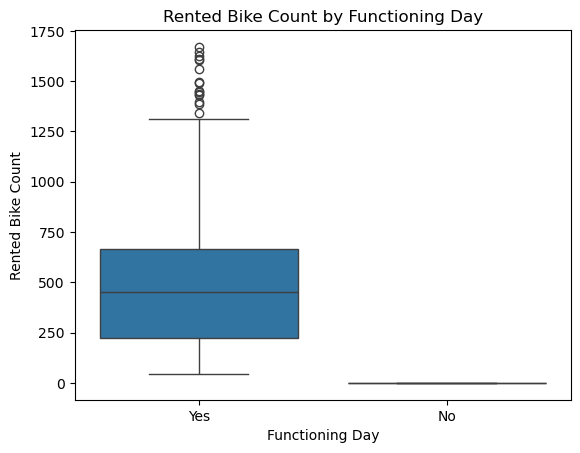

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Functioning Day', y='Rented Bike Count', data=test)
plt.title('Rented Bike Count by Functioning Day')
plt.show()

In [232]:
test.describe()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,720,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00
mean,2018-11-15 12:00:00,11.50,7.81,57.73,1.38,1187.31,-0.93,0.37,0.11,0.17,446.48
min,2018-11-01 00:00:00,0.00,-3.00,13.00,0.00,33.00,-19.00,0.00,0.00,0.00,0.00
25%,2018-11-08 00:00:00,5.75,4.38,41.00,0.80,627.25,-5.10,0.00,0.00,0.00,155.00
50%,2018-11-15 12:00:00,11.50,7.50,57.00,1.20,1218.50,0.20,0.00,0.00,0.00,411.00
75%,2018-11-23 00:00:00,17.25,11.10,75.00,1.90,1788.25,3.52,0.53,0.00,0.00,630.25
max,2018-11-30 00:00:00,23.00,19.30,97.00,5.30,2000.00,13.40,2.22,18.00,8.80,1670.00
std,NaN,6.93,4.53,20.61,0.83,603.91,6.70,0.61,1.14,0.85,350.05
